In [34]:
# This code generates Figure 8

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  2 15:14:03 2020

@author: vicky
"""
# add this: `%matplotlib inline` in the console  for printing the plot


import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math
from time import time as tm
import warnings

import numba
from numba import jit
#from google.colab import drive
#drive.mount('/content/drive')


In [35]:
from SpikingNetFunction import *
from RateNetFunctions import *
from DefaultParamsN5e3 import *

runsims=True

In [36]:

# Perturbations to each population

Ne1=int(Ne/2)

sigma=Xe0/5

ue1=sigma*np.random.randn(Ne)
ve1=sigma*np.random.randn(Ne)
ue2=sigma*np.random.randn(Ne)
ve2=sigma*np.random.randn(Ne)
ue3=sigma*np.random.randn(Ne)
ve3=sigma*np.random.randn(Ne)
ue4=sigma*np.random.randn(Ne)
ve4=sigma*np.random.randn(Ne)

ui1=0*sigma*np.random.randn(Ni)
vi1=0*sigma*np.random.randn(Ni)
ui2=0*sigma*np.random.randn(Ni)
vi2=0*sigma*np.random.randn(Ni)
ui3=0*sigma*np.random.randn(Ni)
vi3=0*sigma*np.random.randn(Ni)
ui4=0*sigma*np.random.randn(Ni)
vi4=0*sigma*np.random.randn(Ni)

NoveltyTrial=numtrials-20
MMTrial=numtrials-10

# Whether the U and V stimuli are on/off
u1on=np.zeros(numtrials)
v1on=np.zeros(numtrials)
u2on=np.zeros(numtrials)
v2on=np.zeros(numtrials)
u3on=np.zeros(numtrials)
v3on=np.zeros(numtrials)
u4on=np.zeros(numtrials)
v4on=np.zeros(numtrials)

# Matches
u1on[0::2]=1
v1on[:]=u1on[:]
u2on[1::2]=1
v2on[:]=u2on[:]
#u3on[2::3]=1
#v3on[:]=u3on[:]

# Mismatches
u1on[MMTrial]=1
v1on[MMTrial]=0
u2on[MMTrial]=0
v2on[MMTrial]=1
#u3on[MMTrial]=0
#v3on[MMTrial]=0

u1on[NoveltyTrial]=0
v1on[NoveltyTrial]=0
u2on[NoveltyTrial]=0
v2on[NoveltyTrial]=0
u3on[NoveltyTrial]=1
v3on[NoveltyTrial]=1
u4on[NoveltyTrial]=0
v4on[NoveltyTrial]=0


# Input perturbations
Xe=Xe0+np.outer(ue1,u1on)+np.outer(ve1,v1on)+np.outer(ue2,u2on)+np.outer(ve2,v2on)+np.outer(ue3,u3on)+np.outer(ve3,v3on)+np.outer(ue4,u4on)+np.outer(ve4,v4on)
Xi=Xi0+np.outer(ui1,u1on)+np.outer(vi1,v1on)+np.outer(ui2,u2on)+np.outer(vi2,v2on)+np.outer(ui3,u3on)+np.outer(vi3,v3on)+np.outer(ui4,u4on)+np.outer(vi4,v4on)



In [37]:
fname1='./MatchMisMatchSpikeSim_dataDistTimeDepI1234_N'+str(int(N/1000))+'e3.npy'

if runsims:
  # Run sim
  #Jei=Jei0.copy()
  #Jii=Jii0.copy()
  startsims = tm()
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    MeanIee,MeanIei,MeanIie,MeanIii,AlleRates,AlliRates,IeeRec,IeiRec,IexRec,VeRec,SeRec,SiRec=MultiTrialSpikingNet0(Jee,Jei0,Jie,Jii0,Xe,Xi,taum,EL,Vth,Vre,DeltaT,VT,Vlb,taue,taui,r0e,r0i,tauSTDP,etae,etai,eiPlast,iiPlast,trialrecord,numerecord,numirecord,Nt,dt,Nburn,maxns,dtRecord)
  simstime = tm()-startsims
  print('Time for simulations: %.2f sec'%(simstime))    
  print('Time per sec: %.2f sec'%(1000*(simstime)/(T*N)))
  ########################################################### save data ###########################################################   
  with open(fname1, 'wb') as f:
    np.save(f, MeanIee)
    np.save(f, MeanIei)
    np.save(f, MeanIie)
    np.save(f, MeanIii)
    np.save(f, Xe)
    np.save(f, Xi)
    np.save(f, AlleRates)
    np.save(f, AlliRates)
    np.save(f, VeRec)
    np.save(f, SeRec)
    np.save(f, SiRec)
    np.save(f, simstime)    

else:
  ########################################################### load data ########################################################### 
  with open(fname1, 'rb') as f:
    MeanIee = np.load(f)
    MeanIei = np.load(f)
    MeanIie = np.load(f)
    MeanIii = np.load(f)
    Xe = np.load(f)
    Xi = np.load(f)
    AlleRates = np.load(f)
    AlliRates = np.load(f)
    VeRec = np.load(f)
    SeRec = np.load(f)
    SiRec = np.load(f) 
    simstime = np.load(f)

0 110 6 6.6 8.9; 
1 110 12 6.2 8.5; 2 110 18 6.2 8.4; 3 110 24 6.0 8.3; 4 110 29 6.0 8.3; 
5 110 35 5.9 8.2; 6 110 41 5.8 8.1; 7 110 47 5.8 8.1; 8 110 52 5.9 8.1; 
9 110 58 5.8 8.1; 10 110 64 5.8 8.1; 11 110 69 5.7 8.0; 12 110 75 5.8 8.1; 
13 110 80 5.7 8.0; 14 110 85 5.8 8.1; 15 110 90 5.6 8.0; 16 110 95 5.8 8.1; 
17 110 100 5.7 8.0; 18 110 105 5.7 8.0; 19 110 110 5.7 8.0; 20 110 115 5.7 8.0; 
21 110 119 5.6 7.9; 22 110 124 5.7 8.0; 23 110 129 5.7 8.0; 24 110 135 5.7 8.0; 
25 110 140 5.6 8.0; 26 110 146 5.7 8.0; 27 110 150 5.7 8.0; 28 110 156 5.7 8.1; 
29 110 161 5.7 8.0; 30 110 166 5.7 8.0; 31 110 171 5.6 8.0; 32 110 177 5.8 8.1; 
33 110 182 5.7 8.0; 34 110 188 5.7 8.1; 35 110 194 5.7 8.0; 36 110 199 5.8 8.1; 
37 110 204 5.6 8.0; 38 110 208 5.6 8.0; 39 110 214 5.7 8.0; 40 110 219 5.7 8.0; 
41 110 224 5.6 7.9; 42 110 229 5.8 8.1; 43 110 234 5.7 8.1; 44 110 239 5.7 8.1; 
45 110 245 5.7 8.1; 46 110 250 5.7 8.1; 47 110 255 5.7 8.0; 48 110 260 5.7 8.2; 
49 110 265 5.7 8.1; 50 110 270 5.8 

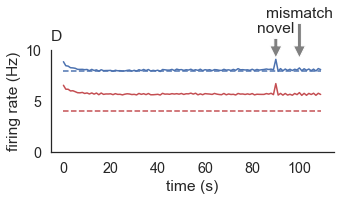

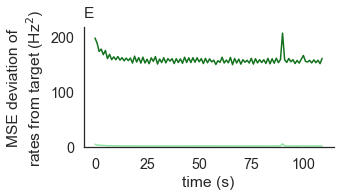

[]

In [52]:
# Make plots


import seaborn as sns
from matplotlib.patches import Rectangle

sns.set(context='notebook',style='white',font_scale=1.3)


# Rates averaged over each trial
reSpikeT=np.mean(AlleRates,axis=1)
riSpikeT=np.mean(AlliRates,axis=1)
rSpikeT=np.array([reSpikeT,riSpikeT])


AllRatesSpike=np.block([AlleRates,AlliRates])
r0Spike=np.block([r0e+np.zeros_like(AlleRates),r0i+np.zeros_like(AlliRates)])
MSEPopSpike=np.mean((AllRatesSpike-r0Spike)**2,axis=1)
MSEMeanSpike=(.8*(reSpikeT-r0e)**2+.2*(riSpikeT-r0i)**2)

MMcolor=[.9,.9,.9]

# Raster and V plot params
NePlot=100
msize=3
NumTrialsPlot=3

TrialsPlot1=range(0,3)
TrialsPlot2=range(29,32)
whichVneuron=1

Xwhichtrials=np.arange(96,103)


plt.figure(figsize=(5, 3))
plt.plot(np.arange(numtrials)*T/1000,1000*reSpikeT,color=sns.color_palette()[3], label=r'$e$')
plt.plot(np.arange(numtrials)*T/1000,1000*riSpikeT,color=sns.color_palette()[0], label=r'$i$')
plt.plot(np.arange(numtrials)*T/1000,1000*r0e+np.zeros(numtrials),'--',color=sns.color_palette()[3], label=r'$e$ target')
plt.plot(np.arange(numtrials)*T/1000,1000*r0i+np.zeros(numtrials),'--',color=sns.color_palette()[0], label=r'$i$ target')
plt.annotate('mismatch', xy=(MMTrial,9.25), xytext=(0, 40),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='gray', shrink=0.0))
plt.annotate('novel', xy=(NoveltyTrial,9.25), xytext=(0, 25),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='gray', shrink=0.0))
sns.despine()
plt.xlabel('time (s)')
plt.ylabel('firing rate (Hz)')
plt.yticks([0,5,10])
plt.ylim(bottom=0)
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('D',loc='left',pad=10)

plt.tight_layout()

plt.savefig('../Paper/Figures/Fig10D.eps')


plt.figure(figsize=(5, 3))
plt.plot(np.arange(numtrials)*T/1000,1e6*MSEPopSpike,color=sns.color_palette('dark')[2],label='MSE of pop')
plt.plot(np.arange(numtrials)*T/1000,1e6*MSEMeanSpike,color=sns.color_palette('pastel')[2],label='MSE of means')
sns.despine()
plt.xlabel('time (s)')
plt.ylabel('MSE deviation of\n'+r'rates from target (Hz$^2$)')
plt.ylim(bottom=-.1)
#plt.legend()
plt.title('E',loc='left',pad=10)

plt.tight_layout()

plt.savefig('../Paper/Figures/Fig10E.eps')


plt.show()




[]